# Classification with Decision Tree


In [19]:
import numpy as np
import pandas as pd
from data_treatment import DataAtts
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [20]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)



Dropdown(description='Original file:', options=('original_data/diabetes_escalonated.csv', 'original_data/data.…

In [21]:
folder_name = files_dropdown.value[14:-4]
fake_directory_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/*"),
    description='Fake file directory:',
    disabled=False,
)
display(fake_directory_dropdown)

Dropdown(description='Fake file directory:', options=('fake_data/diabetes_escalonated',), value='fake_data/dia…

In [22]:


folder_name = fake_directory_dropdown.value
print(folder_name)
fake_files_dropdown = widgets.Dropdown(
    options=glob.glob(folder_name + "/*"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)



fake_data/diabetes_escalonated


Dropdown(description='Fake file:', options=('fake_data/diabetes_escalonated/id-6_epochs-500_layer-1_lr-0.0002_…

In [23]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)    
data = pd.read_csv(file_name)

In [24]:
fake_data = pd.read_csv(fake_files_dropdown.value)
#makes the outcome be 0 or 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) >= 0.5, dataAtts.class_name] = 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) < 0.5, dataAtts.class_name] = 0

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [26]:

fake_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.138297,0.626414,0.510178,0.236434,0.146556,0.524160,0.186706,0.092767,1.0
1,0.001360,0.471387,0.576830,0.210947,0.004377,0.483142,0.170741,0.005094,0.0
2,0.149213,0.554525,0.544073,0.270423,0.097864,0.466329,0.168845,0.109385,0.0
3,0.097698,0.402009,0.544234,0.300452,0.011518,0.460676,0.163571,0.079259,0.0
4,0.005359,0.471368,0.602342,0.223484,0.002330,0.421150,0.223785,0.015835,0.0


In [27]:
print("Original Data")
print("Outcome = 0: ", round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')


print("Fake Data")
try:
    positive=str(round(fake_data[dataAtts.class_name].value_counts()[0]/len(fake_data) * 100,2))
except:
    positive="0"
try:
    negative=str(round(fake_data[dataAtts.class_name].value_counts()[1]/len(fake_data) * 100,2))
except:
    negative="0"
    

print("Outcome = 0: ", positive, '%  of the dataset')
print("Outcome = 1: ", negative, '%  of the dataset')


Original Data
Outcome = 0:  65.1 %  of the dataset
Outcome = 1:  34.9 %  of the dataset

Fake Data
Outcome = 0:  65.49 %  of the dataset
Outcome = 1:  34.51 %  of the dataset


In [28]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))
mixed_data_training_set=pd.concat([original_data_training_set, fake_data_training_set])
mixed_data_testing_set=pd.concat([original_data_testing_set, fake_data_testing_set])

In [29]:
mask_0 = original_data_testing_set[dataAtts.class_name] == 0
mask_1 = original_data_testing_set[dataAtts.class_name] == 1
original_1s = original_data_testing_set[mask_1]
head_0s = original_data_testing_set[mask_0].head(original_1s.shape[0])
tail_0s = original_data_testing_set[mask_0].tail(original_1s.shape[0])
sampeld_0s = original_data_testing_set[mask_0].sample(original_1s.shape[0])
balanced_test = pd.concat([original_1s, sampeld_0s])

In [30]:
train = fake_data_training_set
test = original_data_testing_set

In [31]:
trainX = train.drop(dataAtts.class_name, 1)
testX = test.drop(dataAtts.class_name, 1)
y_train = train[dataAtts.class_name]
y_test = test[dataAtts.class_name]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 3, min_samples_leaf = 1)
clf1 = clf1.fit(trainX,y_train)

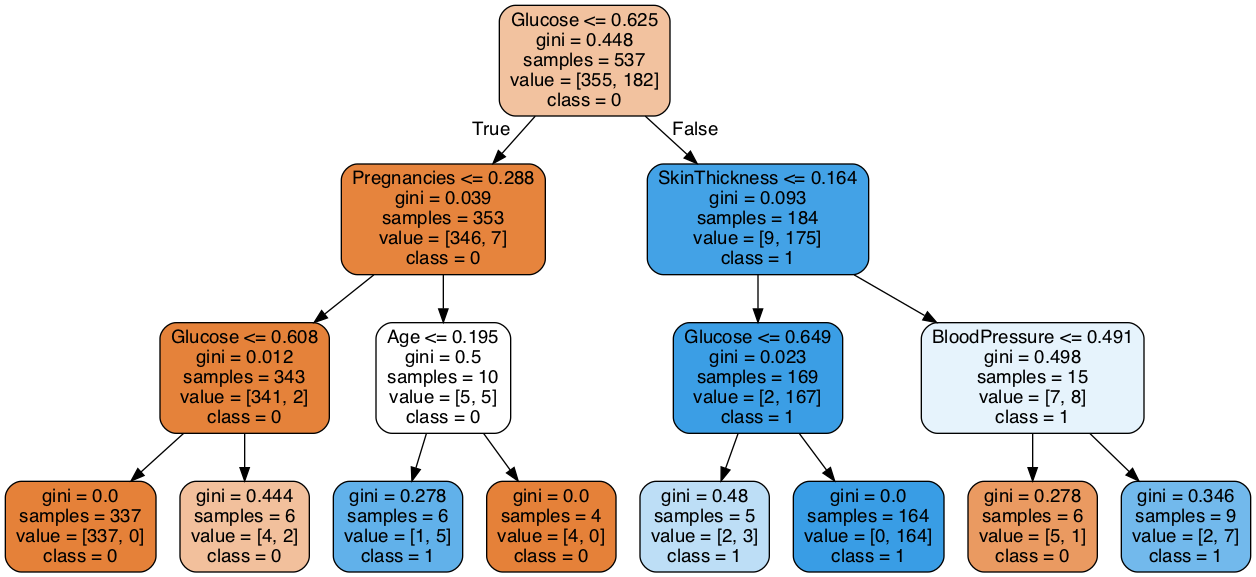

In [32]:
export_graphviz(clf1, out_file="models/tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

In [33]:
pred = clf1.predict_proba(testX)

# If there is only one possible class in the training_data the tree will predict all results to be 1
# The lines below are a little hack to avoid this problem
if pred.shape[1] > 1:
    pred = np.argmax(pred, axis=1)
else:
    pred = pred.reshape((pred.shape[0]))
    if negative=="0":
        pred = pred-1

In [34]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.28695652173913044

In [35]:
conf_matrix = confusion_matrix(y_test.values, pred)
TN, FN, TP, FP = conf_matrix[0][0], conf_matrix[1][0], conf_matrix[1][1], conf_matrix[0][1]
confusion_matrix_str = str(TN) + "/" + str(FN) + "/" + str(TP) + "/" + str(FP)
precision = round(TP/(TP+FP), 3)
recall = round(TP/(TP+FN), 3)
accuracy = round((TP+TN)/(TP+TN+FP+FN), 3)
f1_score = round(2*(precision*recall)/(precision+recall),3)
print("TN/FN/TP/FP: ", confusion_matrix_str)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-1 score: ", f1_score)

TN/FN/TP/FP:  108/23/56/43
Accuracy:  0.713
Precision:  0.566
Recall:  0.709
F-1 score:  0.629


In [36]:
print("\nTest Data")
print("Outcome = 0: ", round(test[dataAtts.class_name].value_counts()[0]/len(test) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(test[dataAtts.class_name].value_counts()[1]/len(test) * 100,2), '%  of the dataset\n')


Test Data
Outcome = 0:  65.65 %  of the dataset
Outcome = 1:  34.35 %  of the dataset

